**Student USN** - [ write here ] <br>
**First Name**  - [ write here ] <br>

**Time :** 60 Minutes 

**Objective:** Apply essential data preprocessing techniques in Python to prepare a real-world dataset for analysis.

**Scenario:** You're hired as a data analyst to investigate trends in customer behavior for an e-commerce company. Their data is messy and needs cleaning before you can draw insights.

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the Datasets
penguin_df = pd.read_csv("datasets/penguins.csv")
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750BMI,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800BMI,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250BMI,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450BMI,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850BMI,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750BMI,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200BMI,FEMALE


In [3]:
#Exploratory Data Analytics
penguin_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
count,341.000000,342.000000,341.000000
mean,44.220821,17.969883,202.299120
std,7.456869,9.101568,21.365825
min,32.100000,13.100000,174.000000
25%,39.300000,15.600000,190.000000
50%,44.500000,17.300000,197.000000
75%,48.500000,18.700000,214.000000
max,137.800000,119.000000,472.000000


In [5]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        340 non-null    object 
 6   gender             334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.9+ KB


In [7]:
for i in penguin_df.columns:
    print(penguin_df[i].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       167
Dream        124
Torgersen     52
Name: count, dtype: int64
culmen_length_mm
41.1    7
45.2    6
50.0    5
50.5    5
46.2    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: count, Length: 165, dtype: int64
culmen_depth_mm
17.0    11
15.0    10
18.6    10
17.9    10
18.5    10
        ..
13.2     1
21.5     1
99.7     1
13.4     1
17.4     1
Name: count, Length: 83, dtype: int64
flipper_length_mm
190.0    21
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
196.0    10
197.0    10
185.0     9
198.0     8
208.0     8
220.0     8
216.0     8
212.0     7
230.0     7
192.0     7
186.0     7
181.0     7
189.0     7
184.0     7
188.0     6
214.0     6
213.0     6
217.0     6
222.0     6
199.0     6
201.0     6
209.0     5
218.0     5
221.0     5
203.0     5
194.0     5
180.0     5
228.0     4
200.0     4
225.0     4
219.0     4
178.0     4
202.

In [8]:
#Handling Missing Values
penguin_df.isna().sum()

species               0
island                1
culmen_length_mm      3
culmen_depth_mm       2
flipper_length_mm     3
body_mass_g           4
gender               10
dtype: int64

In [10]:
penguin_df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g           object
gender                object
dtype: object

In [14]:
penguin_df['body_mass_g'] = penguin_df['body_mass_g'].str.extract('(\d+)').astype(float)
penguin_df['body_mass_g']

AttributeError: Can only use .str accessor with string values!

In [30]:
penguin_df = penguin_df.dropna()

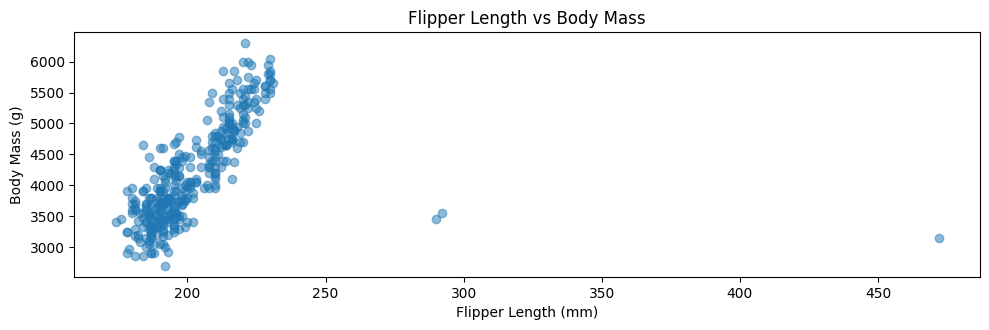

In [25]:
import matplotlib.pyplot as plt

# Assuming penguin_df is your DataFrame with 'flipper_length_mm' and 'body_mass_g'

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter Plot: Flipper Length vs Body Mass
plt.subplot(2, 1, 1)
plt.scatter(penguin_df['flipper_length_mm'], penguin_df['body_mass_g'], alpha=0.5)
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [33]:
#Identify and Direct removal of Outliers
from scipy import stats
# Specify columns to check for outliers
columns_to_check = penguin_df.select_dtypes(include=['number']).columns.tolist()
z_scores = stats.zscore(penguin_df[columns_to_check])
outlier_indices = (abs(z_scores) > 3).any(axis=1)
penguin_df = penguin_df[~outlier_indices]
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,0.066225,0.052880,0.023490,0.291667,MALE
1,Adelie,Torgersen,0.070009,0.040604,0.040268,0.305556,FEMALE
2,Adelie,Torgersen,0.077578,0.046270,0.070470,0.152778,FEMALE
4,Adelie,Torgersen,0.043519,0.058546,0.063758,0.208333,FEMALE
5,Adelie,Torgersen,0.068117,0.070822,0.053691,0.263889,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.142857,0.005666,0.134228,0.618056,FEMALE
340,Gentoo,Biscoe,0.139073,0.011331,0.137584,0.597222,FEMALE
341,Gentoo,Biscoe,0.173132,0.024551,0.161074,0.847222,MALE
342,Gentoo,Biscoe,0.123936,0.016053,0.127517,0.694444,FEMALE


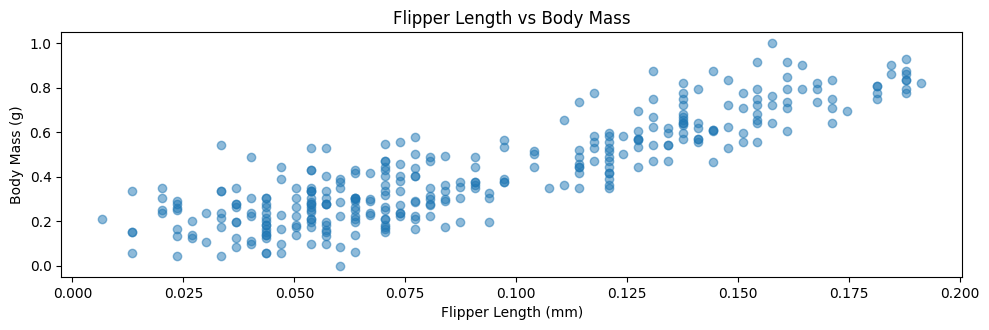

In [38]:
import matplotlib.pyplot as plt

# Assuming penguin_df is your DataFrame with 'flipper_length_mm' and 'body_mass_g'

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter Plot: Flipper Length vs Body Mass
plt.subplot(2, 1, 1)
plt.scatter(penguin_df['flipper_length_mm'], penguin_df['body_mass_g'], alpha=0.5)
plt.title('Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [31]:
#Feature Normalization [MinMax Scalar]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
penguin_df[columns_to_check] = scaler.fit_transform(penguin_df[columns_to_check])
penguin_df

C:\Users\Srikrishna U N\AppData\Local\Temp\ipykernel_17744\2354672500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df[columns_to_check] = scaler.fit_transform(penguin_df[columns_to_check])


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,0.066225,0.052880,0.023490,0.291667,MALE
1,Adelie,Torgersen,0.070009,0.040604,0.040268,0.305556,FEMALE
2,Adelie,Torgersen,0.077578,0.046270,0.070470,0.152778,FEMALE
4,Adelie,Torgersen,0.043519,0.058546,0.063758,0.208333,FEMALE
5,Adelie,Torgersen,0.068117,0.070822,0.053691,0.263889,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.142857,0.005666,0.134228,0.618056,FEMALE
340,Gentoo,Biscoe,0.139073,0.011331,0.137584,0.597222,FEMALE
341,Gentoo,Biscoe,0.173132,0.024551,0.161074,0.847222,MALE
342,Gentoo,Biscoe,0.123936,0.016053,0.127517,0.694444,FEMALE


In [35]:
#Feature Encoding or One Hot Encoding [As per the requirnments]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
to_encode = ['species','island','gender']
for i in to_encode:
    penguin_df[i] = encoder.fit_transform(penguin_df[i])
penguin_df

C:\Users\Srikrishna U N\AppData\Local\Temp\ipykernel_17744\4024655333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df[i] = encoder.fit_transform(penguin_df[i])
C:\Users\Srikrishna U N\AppData\Local\Temp\ipykernel_17744\4024655333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df[i] = encoder.fit_transform(penguin_df[i])
C:\Users\Srikrishna U N\AppData\Local\Temp\ipykernel_17744\4024655333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,0,2,0.066225,0.052880,0.023490,0.291667,2
1,0,2,0.070009,0.040604,0.040268,0.305556,1
2,0,2,0.077578,0.046270,0.070470,0.152778,1
4,0,2,0.043519,0.058546,0.063758,0.208333,1
5,0,2,0.068117,0.070822,0.053691,0.263889,2
...,...,...,...,...,...,...,...
338,2,0,0.142857,0.005666,0.134228,0.618056,1
340,2,0,0.139073,0.011331,0.137584,0.597222,1
341,2,0,0.173132,0.024551,0.161074,0.847222,2
342,2,0,0.123936,0.016053,0.127517,0.694444,1


In [36]:
from sklearn.model_selection import train_test_split

# Assuming penguin_df is your DataFrame
X = penguin_df[[col for col in penguin_df.columns if col != 'species']]
y = penguin_df['species']

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (257, 6) y: (257,)
Testing set - X: (65, 6) y: (65,)


In [37]:
#Just execute the cell after completing the above tasks.
import getpass
from datetime import datetime

username = getpass.getuser()
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

print(f"Username: {username}")
print(f"Timestamp: {timestamp}")

Username: Srikrishna U N
Timestamp: 2024-02-02 13:04:23
